In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load Google stock price dataset
data = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
# Assume 'Close' is the target column for prediction
data = data[["Close"]]
data.dropna(inplace=True)

<ipython-input-4-26756ae1b545>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [5]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [6]:
# Create sequences for time series prediction
def create_sequences(data, sequence_length):
    X, Y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

In [7]:
sequence_length = 60
X, Y = create_sequences(data_scaled, sequence_length)

In [8]:
# Reshape input to be 3D for RNN [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [9]:
# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

In [10]:
# Build RNN model
model = keras.Sequential([
    layers.SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    layers.SimpleRNN(50),
    layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# Train model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.7665e-04 - val_loss: 2.0493e-04
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.6477e-04 - val_loss: 6.9833e-04
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.0272e-04 - val_loss: 1.8010e-04
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.9348e-04 - val_loss: 3.1231e-04
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.5304e-04 - val_loss: 3.4743e-04
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.3699e-04 - val_loss: 2.0966e-04
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.3451e-04 - val_loss: 3.5942e-04
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.5562e-04 - val_loss: 3.2140e-04
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 1.6607e-04 - val_loss: 2.3812e-04
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.0431e-04 - val_loss: 2.5903e-04
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.5809e-0

In [18]:
# Evaluate model
loss = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0010   
Test Loss: 0.0016


In [19]:
# Predict
predicted_stock_price = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [20]:
# Inverse transform predictions
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(Y_test.reshape(-1, 1))

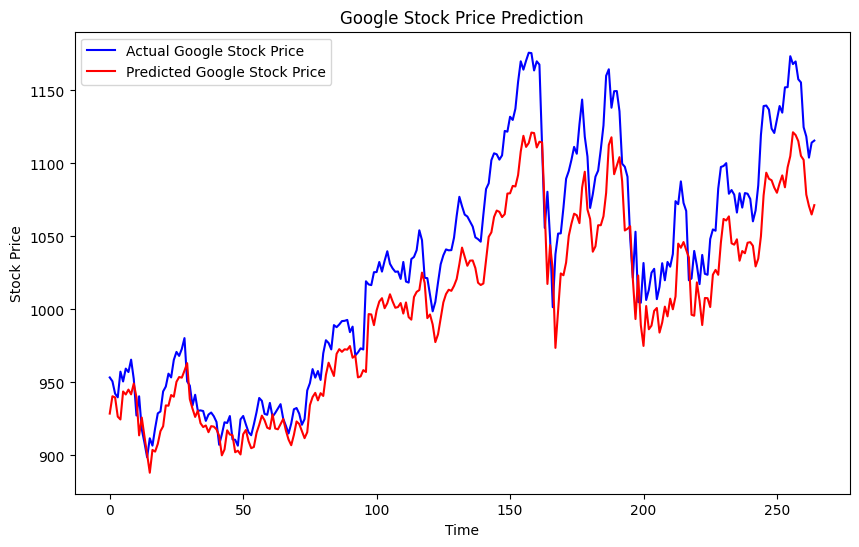

In [21]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Okay, let's do the simple, cell-by-cell explanation for your `Ass_4.ipynb` (Google Stock Price Prediction using RNN) code.

---

**File: Ass_4.ipynb - Stock Price Prediction using RNN**

*(Goal: Teach the computer to look at the historical closing stock prices of Google for a period (like the last 60 days) and predict what the closing price will be on the next day.)*

**Cell 1: Imports**
```python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout # Note: LSTM/Dropout aren't used in cell 9 model
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
```
*   **What it does:** Brings in the necessary tools (libraries).
*   **Terminology:**
    *   `tensorflow`, `keras`, `layers`, `Sequential`, `Dense`: Same as before (Deep Learning tools).
    *   `LSTM`, `Dropout`: Types of Keras layers. LSTM is a more advanced type of RNN layer, good for remembering long-term patterns. Dropout is a technique to prevent overfitting. (Note: Your final model in Cell 9 uses `SimpleRNN`, not `LSTM` or `Dropout`, but they were imported).
    *   `sklearn.preprocessing.MinMaxScaler`: A tool to rescale numerical data (like stock prices) to a specific range (usually 0 to 1).
    *   `pandas` (`pd`): For loading and handling data from the CSV file.
    *   `numpy` (`np`): For numerical operations, especially creating and reshaping data sequences.
    *   `matplotlib.pyplot` (`plt`): For plotting the results.

**Cell 2: Load Dataset**
```python
data = pd.read_csv('Google_Stock_Price_Train.csv')
```
*   **What it does:** Reads the stock price data from a CSV file named `Google_Stock_Price_Train.csv` into a pandas DataFrame (table). This file likely contains columns like Date, Open, High, Low, Close, Volume, etc., for Google stock.

**Cell 3: Select and Clean Data**
```python
data = data[["Close"]]
data.dropna(inplace=True)
```
*   **What it does:**
    *   Selects only the 'Close' price column, as that's the value we want to predict.
    *   `dropna()`: Removes any rows that might have missing values in the 'Close' column, ensuring clean data.

**Cell 4: Normalize the Data**
```python
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)
```
*   **What it does:** Rescales the 'Close' prices to be between 0 and 1.
    *   `MinMaxScaler`: The tool used for scaling. `feature_range=(0, 1)` specifies the target range.
    *   `fit_transform()`: Learns the minimum and maximum closing prices from the data (`fit`) and then applies the scaling (`transform`). The `scaler` object now "remembers" how to scale and unscale this data.
*   **Why? (Normalization):** RNNs, like other neural networks, generally perform better with normalized input data.

**Cell 5: Define Sequence Creation Function**
```python
def create_sequences(data, sequence_length):
    X, Y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0]) # Input: sequence_length previous days
        Y.append(data[i, 0])                   # Output: the current day
    return np.array(X), np.array(Y)
```
*   **What it does:** Defines a helper function to prepare the data for the RNN.
*   **How it works:** It slides a window of size `sequence_length` across the scaled stock price data.
    *   For each window, it takes the `sequence_length` prices *inside* the window as the input features (`X`).
    *   It takes the price *immediately following* the window as the target output (`Y`) that the model should learn to predict.
*   **Example:** If `sequence_length` is 60, it takes prices from day 1 to 60 as input (`X`) and the price of day 61 as the output (`Y`). Then, prices from day 2 to 61 as `X`, and day 62 as `Y`, and so on.
*   **Terminology:**
    *   **Time Series:** Data points collected over time in sequence.
    *   **Sequence Length / Lookback Period:** The number of past time steps used as input to predict the next step.

**Cell 6: Create Input/Output Sequences**
```python
sequence_length = 60
X, Y = create_sequences(data_scaled, sequence_length)
```
*   **What it does:** Calls the function defined in Cell 5 to create the actual input (`X`) and output (`Y`) arrays using the scaled data and a sequence length of 60 days.

**Cell 7: Reshape Input Data for RNN**
```python
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
```
*   **What it does:** Changes the shape of the input data `X`.
*   **Why?** Keras RNN layers (like `SimpleRNN` or `LSTM`) expect input data in a 3D format:
    *   Dimension 1: Number of samples (sequences).
    *   Dimension 2: Number of time steps (the `sequence_length`, 60 here).
    *   Dimension 3: Number of features at each time step (just 1 here, the 'Close' price).
*   So, if `X` was initially (e.g.) 1000 samples x 60 time steps, this reshapes it to 1000 x 60 x 1.

**Cell 8: Split into Training and Test Sets**
```python
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]
```
*   **What it does:** Splits the prepared sequences (`X`, `Y`) into a training set (80%) and a test set (20%).
*   **Important:** For time series, the split is done chronologically. The earlier data is used for training, and the later data is used for testing. This prevents the model from "seeing the future" during training.

**Cell 9: Build the RNN Model**
```python
model = keras.Sequential([
    layers.SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    layers.SimpleRNN(50),
    layers.Dense(1)
])
```
*   **What it does:** Defines the architecture of the Recurrent Neural Network (RNN).
*   **Terminology & Layers:**
    *   `keras.Sequential([...])`: Building the model layer by layer.
    *   `layers.SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1))`: First **SimpleRNN Layer**.
        *   **SimpleRNN:** The most basic type of RNN layer. It has a "memory" state that gets updated as it processes each step in the input sequence, allowing it to capture information from previous time steps.
        *   `50`: It has 50 internal units (neurons) in this layer.
        *   `return_sequences=True`: This tells the layer to output the hidden state for *each* time step in the sequence. This is necessary because the next layer is also an RNN layer and needs sequential input.
        *   `input_shape=(X_train.shape[1], 1)`: Specifies the shape of the input for the first layer: (`sequence_length`, `number_of_features`), which is (60, 1) here.
    *   `layers.SimpleRNN(50)`: Second **SimpleRNN Layer** (stacked RNN).
        *   `50`: Also has 50 units.
        *   `return_sequences=False` (default): This layer only outputs the hidden state from the *last* time step of the sequence. This condensed representation of the sequence is then passed to the final Dense layer.
    *   `layers.Dense(1)`: The **Output Layer**.
        *   `Dense`: A standard fully connected layer.
        *   `1`: One neuron, because we are predicting a single continuous value (the next day's closing price).
        *   **No activation function specified (linear):** This is typical for regression problems where the output can be any real number.
*   **RNN (Recurrent Neural Network):** A type of neural network designed to work with sequential data (like time series or text) by having connections that loop back, allowing information to persist (like a memory).

**Cell 10: Compile Model**
```python
model.compile(optimizer='adam', loss='mean_squared_error')
```
*   **What it does:** Configures the model for training.
*   **Terminology:**
    *   `optimizer='adam'`: Same efficient optimizer as before.
    *   `loss='mean_squared_error'`: The **loss function**.
        *   **Mean Squared Error (MSE):** A common loss function for regression problems. It measures the average squared difference between the model's predictions and the actual values. The model tries to minimize this error.

**Cell 11: Train Model**
```python
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)
```
*   **What it does:** Trains the RNN model using the training sequences.
    *   `X_train, Y_train`: The input sequences and their corresponding target next-day prices.
    *   `epochs=50`: The model sees the entire training set 50 times.
    *   `batch_size=32`: Processes data in batches of 32 sequences.
    *   `validation_split=0.1`: Uses 10% of the training data for validation during training.
    *   `verbose=1`: Shows progress bars during training.

**Cell 12: Evaluate Model**
```python
loss = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss:.4f}")
```
*   **What it does:** Calculates the model's loss (Mean Squared Error) on the unseen test data (`X_test`, `Y_test`). This gives an idea of how well the model generalizes.

**Cell 13: Predict**
```python
predicted_stock_price_scaled = model.predict(X_test) # Renamed for clarity
```
*   **What it does:** Uses the trained model to predict the (scaled) next-day closing prices for all the input sequences in the test set `X_test`.

**Cell 14: Inverse Transform Predictions**
```python
predicted_stock_price = scaler.inverse_transform(predicted_stock_price_scaled) # Use scaled predictions
y_test_original = scaler.inverse_transform(Y_test.reshape(-1, 1)) # Renamed for clarity
```
*   **What it does:** Converts the model's predictions (which are scaled between 0 and 1) back into the original stock price scale using the `scaler` object learned earlier. It also converts the actual test target values (`Y_test`) back to the original scale for comparison.
*   **Terminology:**
    *   **Inverse Transform:** Undoing the normalization/scaling process.

**Cell 15: Plot Results**
```python
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, color='blue', label='Actual Google Stock Price') # Use original scale actuals
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price') # Use original scale predictions
# ... (titles, labels, legend, show)
```
*   **What it does:** Creates a plot comparing the actual stock prices from the test set (`y_test_original`) against the prices predicted by the RNN model (`predicted_stock_price`) over time.
*   **Why?** This visual comparison helps assess how well the model's predictions follow the trend and magnitude of the actual prices.

---

**Key RNN Takeaways for Your Practical:**

*   **RNNs are for Sequences:** They excel at tasks where the order of data matters, like time series or language.
*   **Memory:** RNNs have an internal state (memory) that allows them to consider past information when processing the current input step. `SimpleRNN` is the basic version.
*   **Input Shaping:** RNNs need 3D input `(samples, time steps, features)`.
*   **Sequence Creation:** For time series prediction, you need to create overlapping input sequences and corresponding target outputs.
*   **Normalization:** Scaling data (e.g., 0-1) is important for RNNs.
*   **Chronological Split:** Train/test splits must respect the time order.
*   **Regression Loss:** Use loss functions like 'mean\_squared\_error' when predicting continuous values.
*   **Inverse Transform:** Remember to convert scaled predictions back to the original units for interpretation.

This covers the flow and key concepts of your RNN stock prediction code!